In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_F1_Project/datasets_csv/final_data.csv')

In [8]:
drivers_2023 = data[data['year']==2023]['Driver Name'].unique()

In [9]:
data_2023 = data[data['year'] > 1984]

In [10]:
#Looking into the number of DNF (All years)
#Grouping by driver
dnf_driver = data.groupby('Driver Name')['DNF (Driver Error)'].sum()
races_num_driver = data.groupby('Driver Name')['DNF (Driver Error)'].count()
dnf_norm_driver = (dnf_driver/races_num_driver)

#Results equal to 1 and 0 implied that the driver did not compete in a representative amount of races. This results will be filtered to eleminate noise
driver_dnf_results = pd.DataFrame()
driver_dnf_results['driver'] = ""
driver_dnf_results['DNF Ratio'] = ""

driver_name = []
dnf_driver_filtered = []

for i in range(len(dnf_norm_driver.index)):
  name = dnf_norm_driver.index[i]
  dnf = dnf_norm_driver[dnf_norm_driver.index[i]]

  if  0 < dnf < 1:
    driver_name.append(name)
    dnf_driver_filtered.append(dnf)

driver_dnf_results['driver'] = driver_name
driver_dnf_results['DNF Ratio'] = dnf_driver_filtered

Text(0.5, 1.0, 'DNFs ratio due to driver error - Top 50')

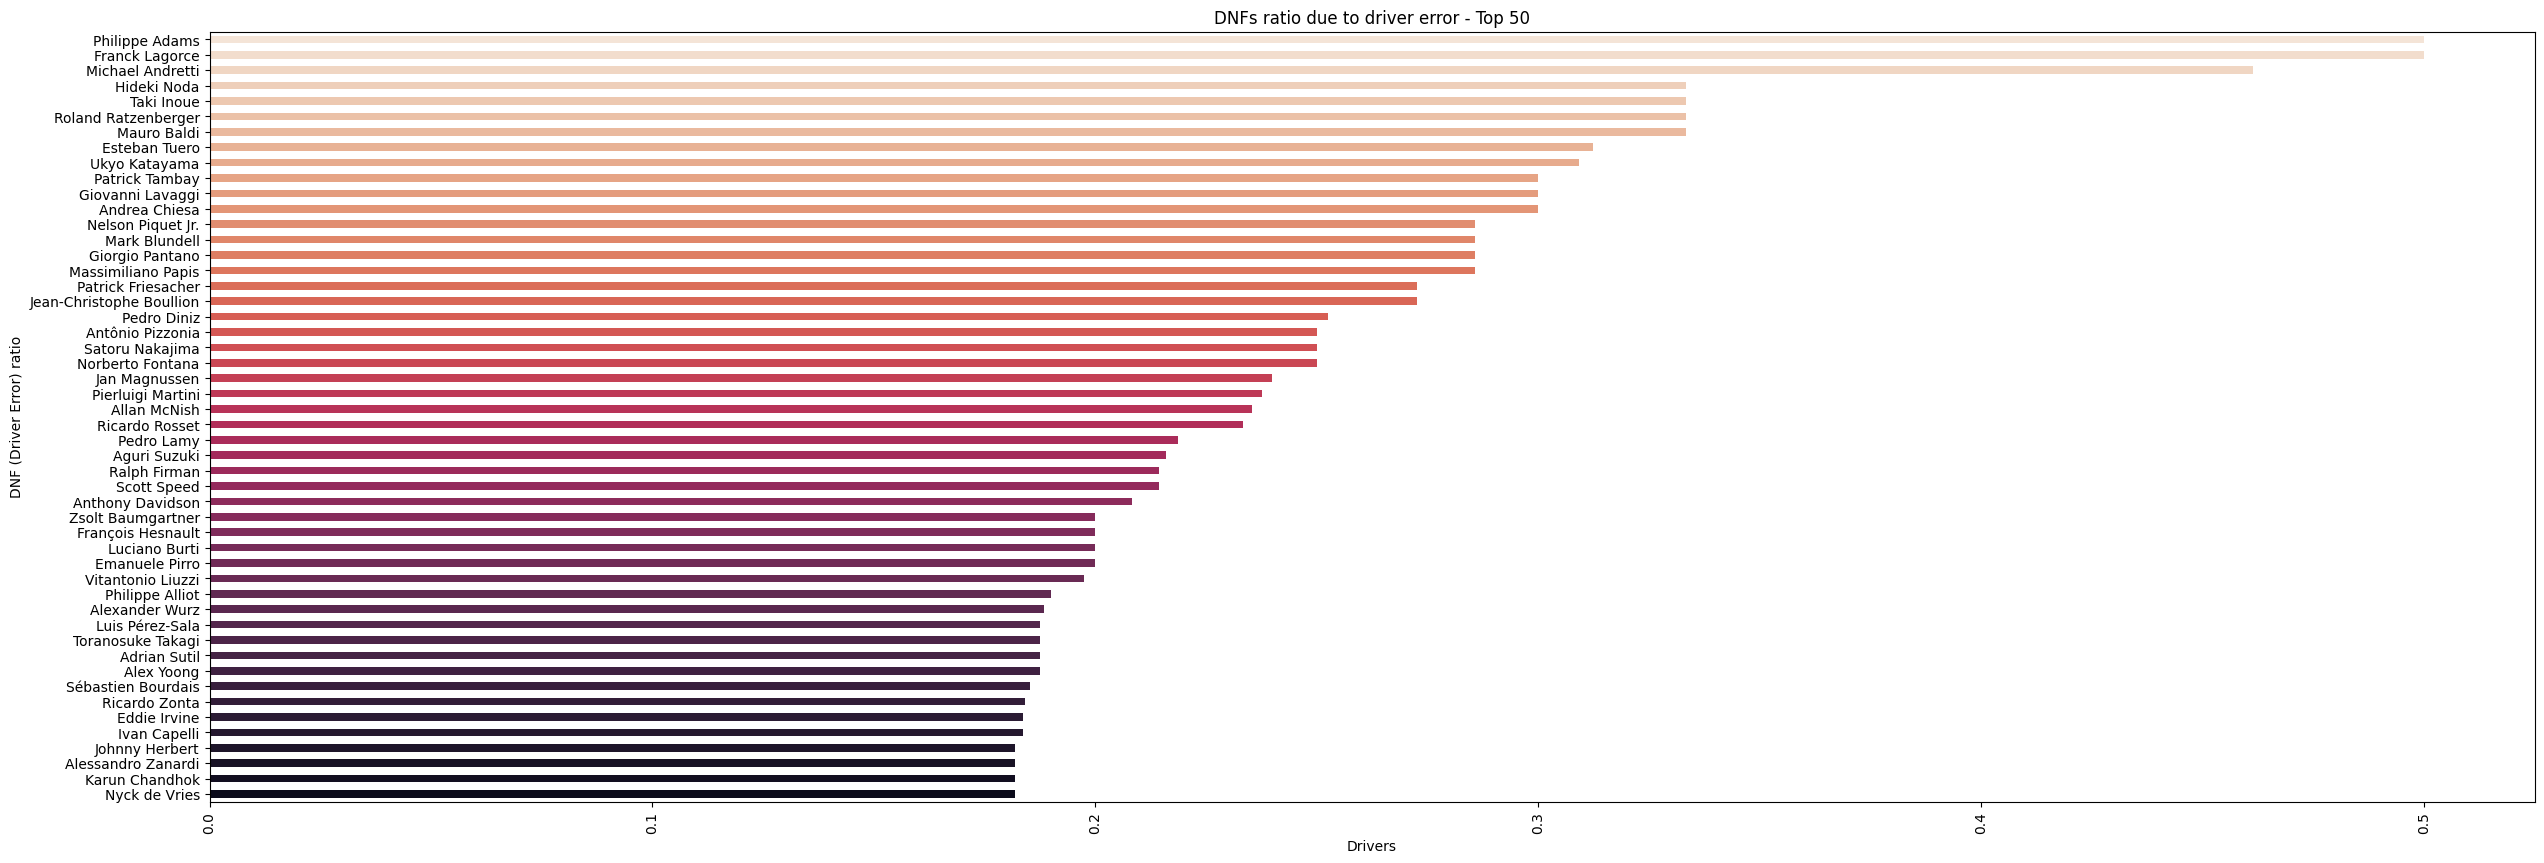

In [11]:
font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':10
}

driver_dnf_results_sorted = driver_dnf_results.sort_values(by=['DNF Ratio'], ascending=False)
driver_dnf_results_sorted  = driver_dnf_results_sorted [:50]
plt.figure(figsize=(30,10))
bars = sns.barplot(y=driver_dnf_results_sorted['driver'],x=driver_dnf_results_sorted['DNF Ratio'],width=0.5, palette = 'rocket_r')
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('DNF (Driver Error) ratio')
plt.title('DNFs ratio due to driver error - Top 50')

Text(0.5, 1.0, 'DNFs ratio due to driver error - Bottom 50')

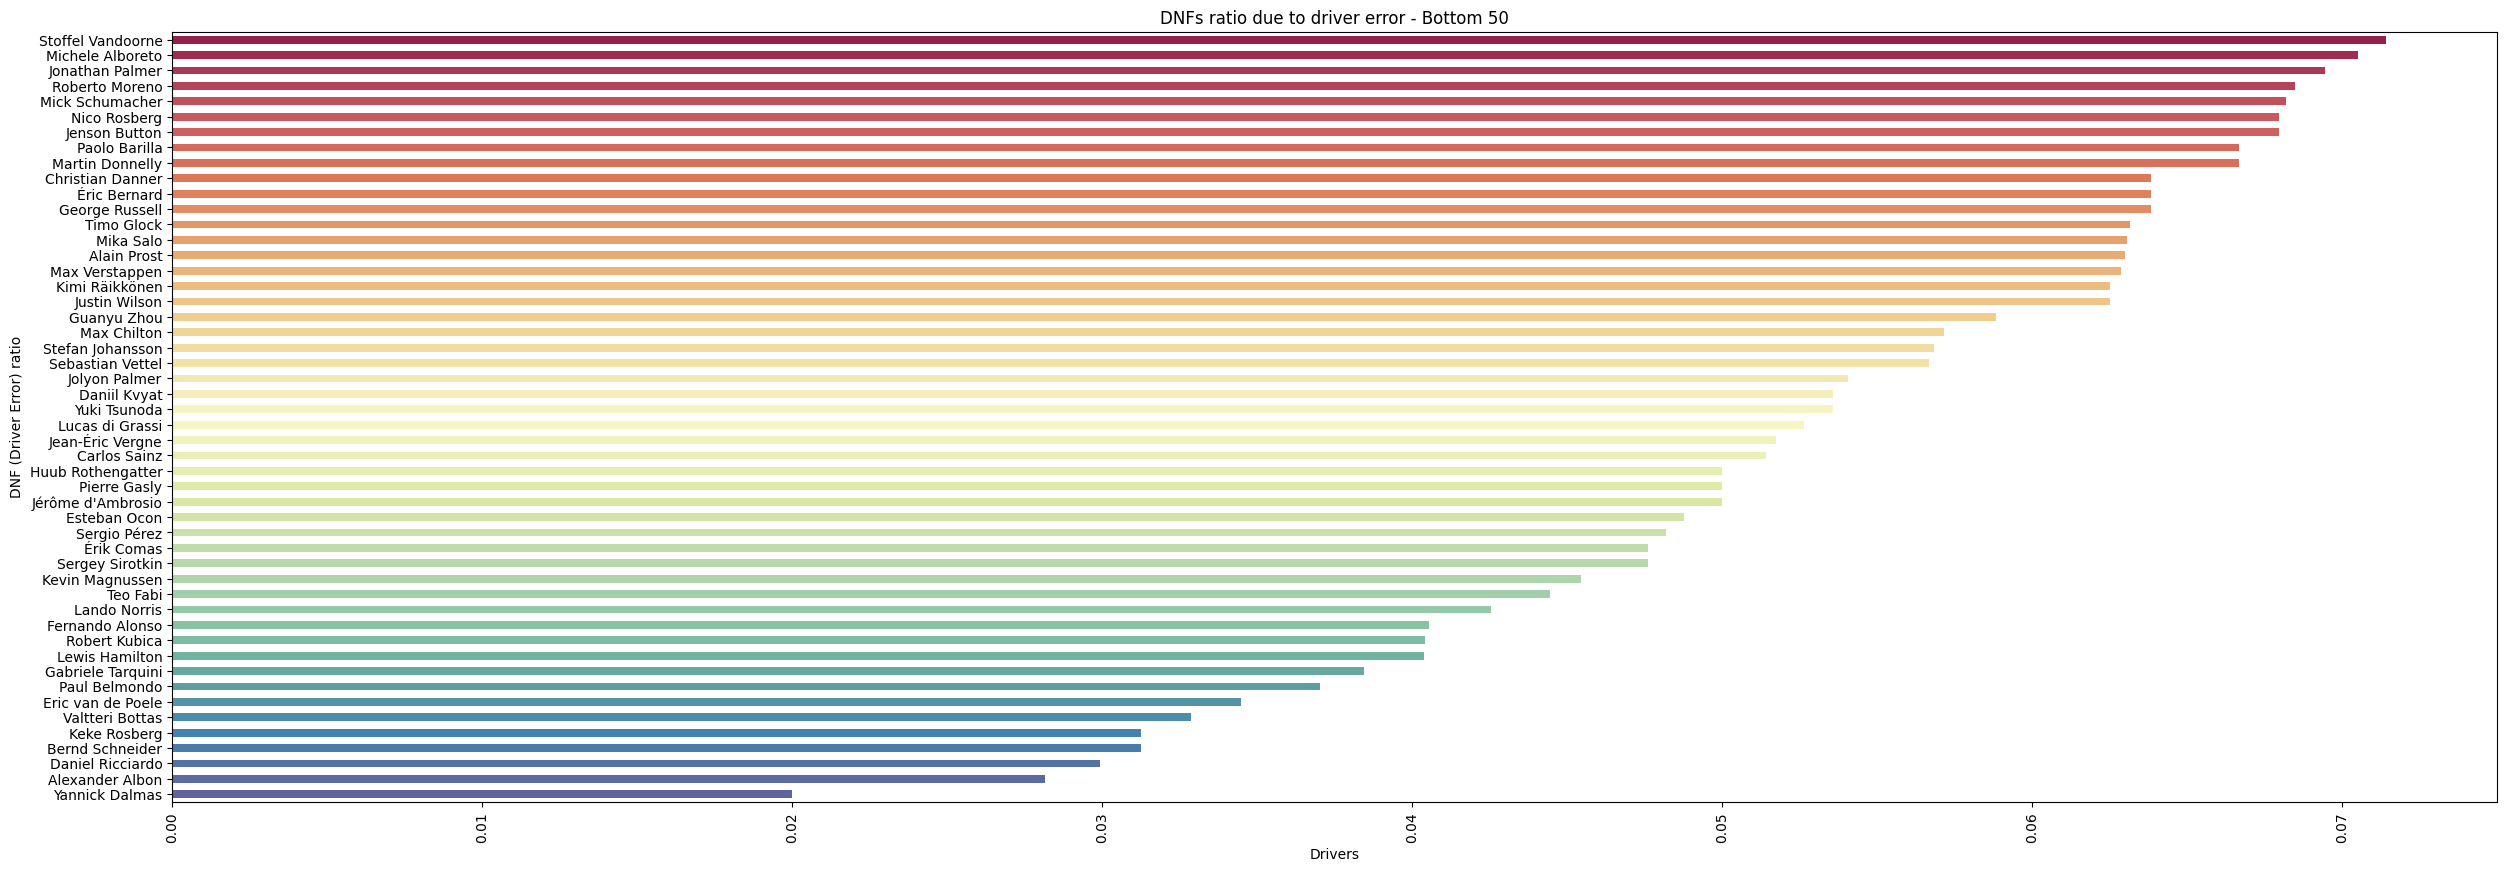

In [12]:
font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':10
}

driver_dnf_results_sorted = driver_dnf_results.sort_values(by=['DNF Ratio'], ascending=False)
driver_dnf_results_sorted  = driver_dnf_results_sorted.tail(50)
plt.figure(figsize=(30,10))
bars = sns.barplot(y=driver_dnf_results_sorted['driver'],x=driver_dnf_results_sorted['DNF Ratio'],width=0.5, palette='Spectral')
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('DNF (Driver Error) ratio')
plt.title('DNFs ratio due to driver error - Bottom 50')

In [13]:
#Looking into the number of DNF
#Grouping by constructor
dnf_constructor = data.groupby('Constructor Name')['DNF (Constructor Fault)'].sum()
races_num_constructor = data.groupby('Constructor Name')['DNF (Constructor Fault)'].count()
dnf_norm_constructor = (dnf_constructor/races_num_constructor)

#Results equal to 1 and 0 implied that the driver did not compete in a representative amount of races. This results will be filtered to eleminate noise
constructor_dnf_results = pd.DataFrame()
constructor_dnf_results['Constructor Name'] = ""
constructor_dnf_results['DNF Ratio'] = ""

constructor_name = []
dnf_constructor_filtered = []

for i in range(len(dnf_norm_constructor.index)):
  name = dnf_norm_constructor.index[i]
  dnf = dnf_norm_constructor[dnf_norm_constructor.index[i]]

  if  0 < dnf < 1:
    constructor_name.append(name)
    dnf_constructor_filtered.append(dnf)

constructor_dnf_results['Constructor Name']= constructor_name
constructor_dnf_results['DNF Ratio'] = dnf_constructor_filtered


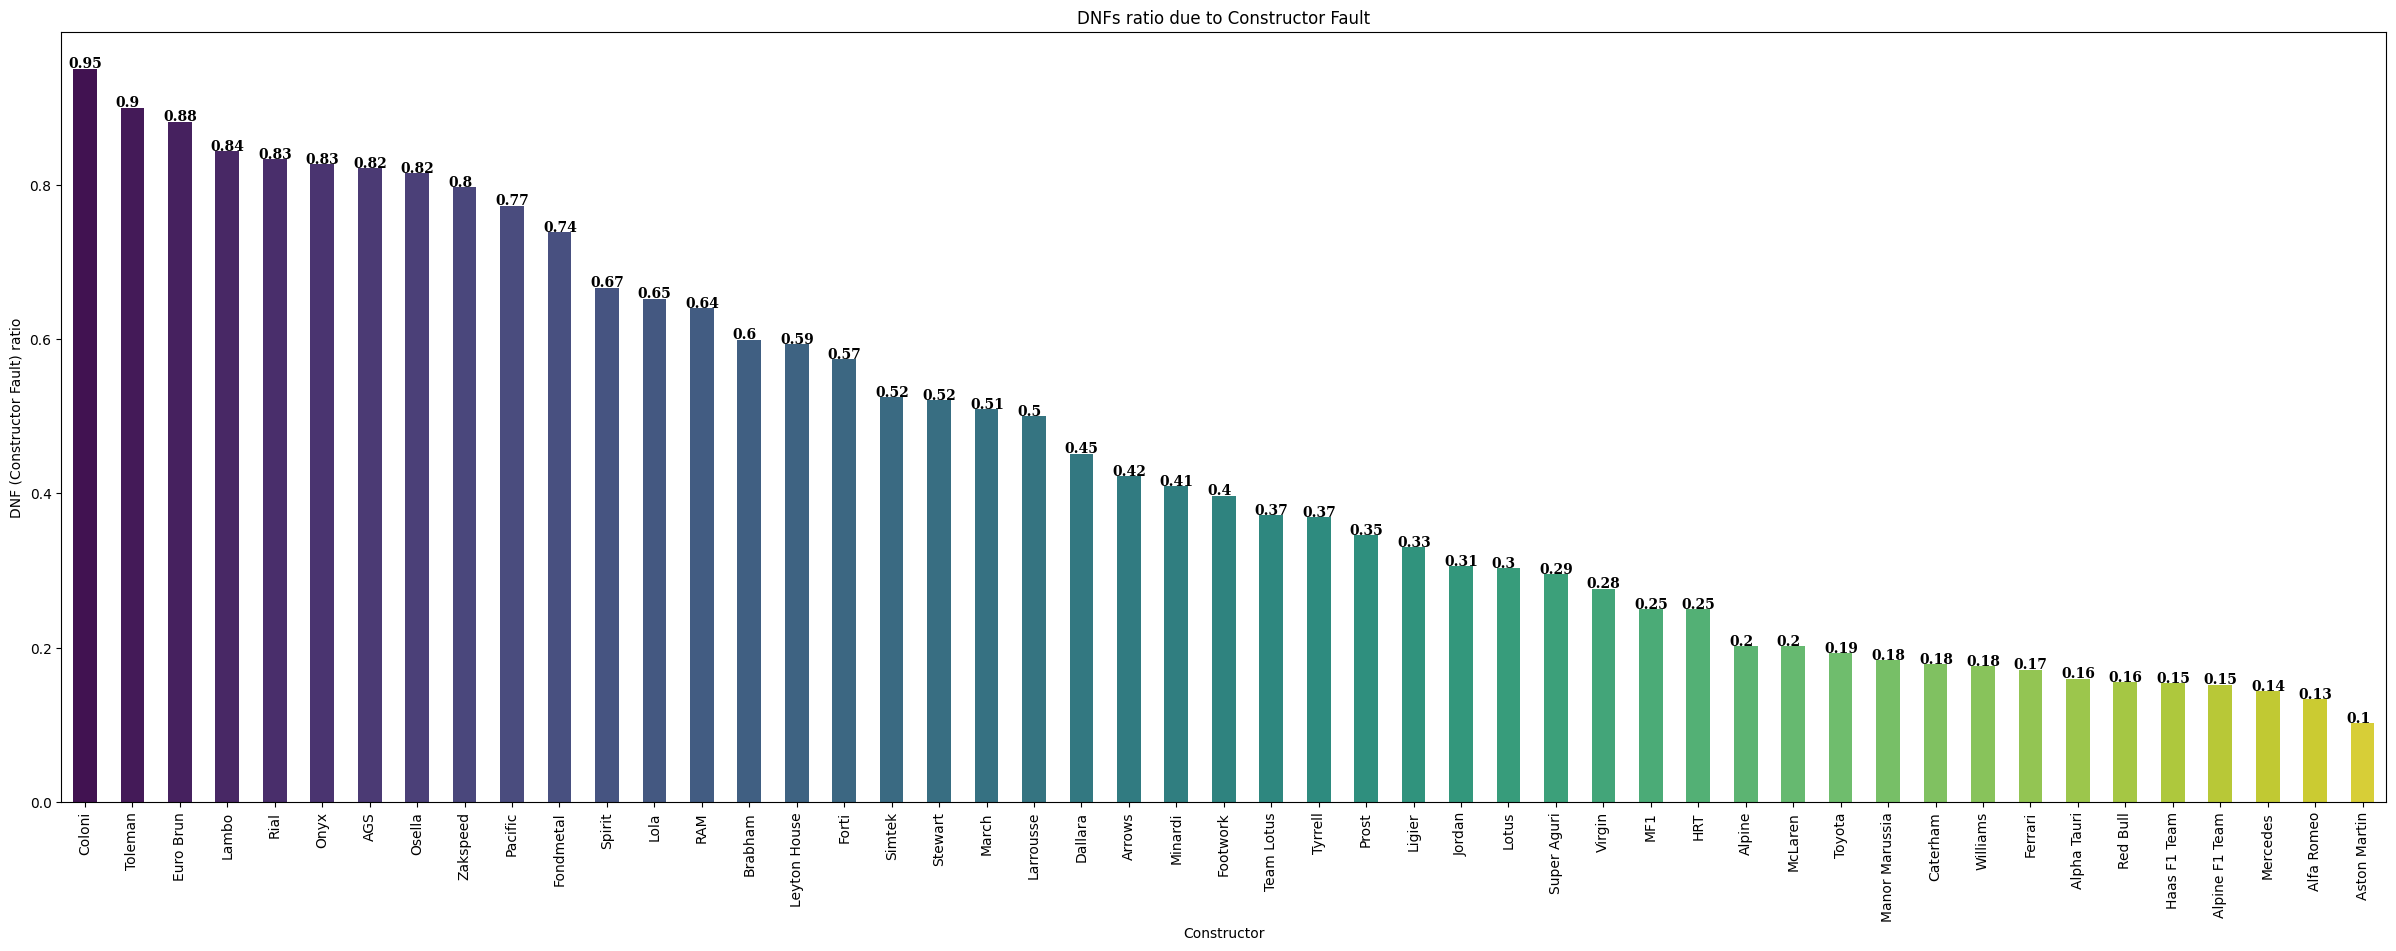

In [14]:
font = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':10
}

constructor_dnf_results_sorted = constructor_dnf_results.sort_values(by=['DNF Ratio'], ascending=False)
plt.figure(figsize=(30,10))
bars = sns.barplot(x=constructor_dnf_results_sorted['Constructor Name'],y=constructor_dnf_results_sorted['DNF Ratio'],width=0.5, orient = 'v', palette = 'viridis')
plt.xticks(rotation=90)
plt.xlabel('Constructor')
plt.ylabel('DNF (Constructor Fault) ratio')
plt.title('DNFs ratio due to Constructor Fault')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.001,f'{round(yval,2)}',fontdict=font)

In [15]:
#Rain Masters
#Looking into the number of wet races wins
wet_win = data.groupby(['Driver Name','weather_wet'])['Driver Win'].sum().sort_values(ascending=False)
wet_races_number = data.groupby(['Driver Name','weather_wet'])['Driver Win'].count()
wet_win_ratio = wet_win/wet_races_number

In [16]:
wet_races = pd.DataFrame()
wet_races['Driver Name'] = ""
wet_races['Driver Win'] = ""

driver_name = []
driver_win = []

for i in range(1,len(wet_win_ratio.index)):
  name = wet_win_ratio.index[i][0]
  wet = wet_win_ratio.index[i][1]
  if wet == 1:
    win = wet_win_ratio[name][wet]
    driver_name.append(name)
    driver_win.append(win)

wet_races['Driver Name'] = driver_name
wet_races['Driver Win'] = driver_win
wet_races = wet_races.sort_values(by='Driver Win', ascending = False)



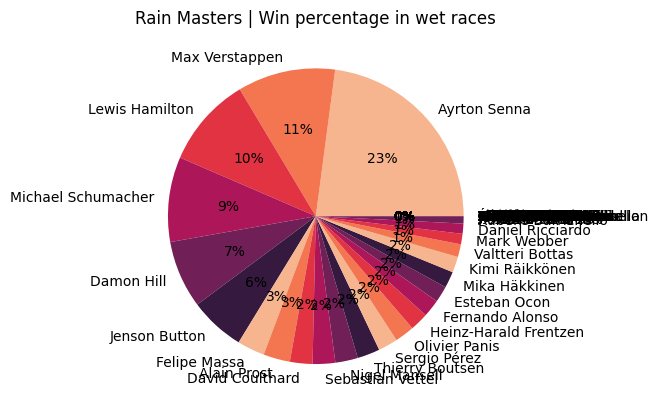

In [17]:
colors = sns.color_palette("rocket_r")
plt.pie(x = wet_races['Driver Win'], labels = wet_races['Driver Name'], colors = colors,autopct='%.0f%%')
plt.title('Rain Masters | Win percentage in wet races')
plt.show()

In [18]:
#Looking into the home wins
#Grouping by driver
home_win_driver = data.groupby(['Driver Name','Driver Home Race'])['Driver Win'].sum()
home_races_driver = data.groupby(['Driver Name','Driver Home Race'])['Driver Win'].count()
home_win_ratio_driver = (home_win_driver/home_races_driver)
home_win_ratio_driver = home_win_ratio_driver.sort_values(ascending = False)

In [19]:
home_win = pd.DataFrame()
home_win['driver'] = ""
home_win['Home Win Ratio'] = ""

driver_name = []
home_win_ratio = []

for i in range(1,len(home_win_ratio_driver.index)):
  name = home_win_ratio_driver.index[i][0]
  home = home_win_ratio_driver.index[i][1]
  if home == 1:
    win = home_win_ratio_driver[name][home]
    driver_name.append(name)
    home_win_ratio.append(win)

home_win['driver'] = driver_name
home_win['Home Win Ratio'] = home_win_ratio
home_win = home_win.sort_values(by='Home Win Ratio', ascending = False)

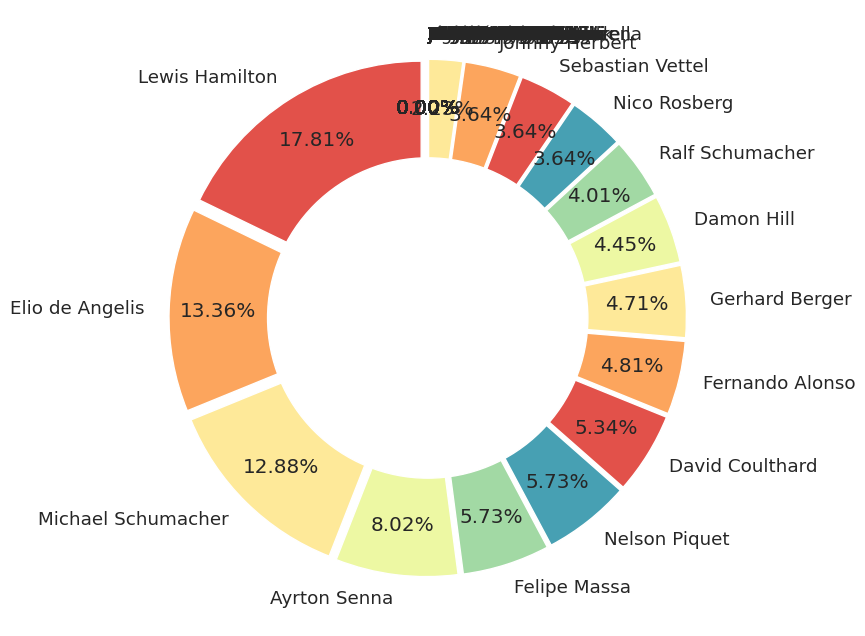

In [20]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

plt.pie(
    x=home_win['Home Win Ratio'], labels=home_win['driver'],
    colors=sns.color_palette('Spectral'),
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05]*len(home_win['Home Win Ratio']),
)

### Add a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [21]:
#Looking into the home wins
#Grouping by constructor
home_win_constructor = data.groupby(['Constructor Name','Constructor Home Race'])['Constructor Win'].sum()
home_races_constructor = data.groupby(['Constructor Name','Constructor Home Race'])['Constructor Win'].count()
home_win_ratio_constructor = (home_win_constructor/home_races_constructor)
home_win_ratio_constructor = home_win_ratio_constructor.sort_values(ascending = False)

In [22]:
home_win_constructor = pd.DataFrame()
home_win_constructor['Constructor'] = ""
home_win_constructor['Home Win Ratio'] = ""

constructor_name = []
constructor_home_win_ratio = []

for i in range(1,len(home_win_ratio_constructor.index)):
  name = home_win_ratio_constructor.index[i][0]
  home = home_win_ratio_constructor.index[i][1]
  if home == 1:
    win = home_win_ratio_constructor[name][home]
    constructor_name.append(name)
    constructor_home_win_ratio.append(win)

home_win_constructor['Constructor'] = constructor_name
home_win_constructor['Home Win Ratio'] = constructor_home_win_ratio
home_win_constructor = home_win_constructor.sort_values(by='Home Win Ratio', ascending = False)

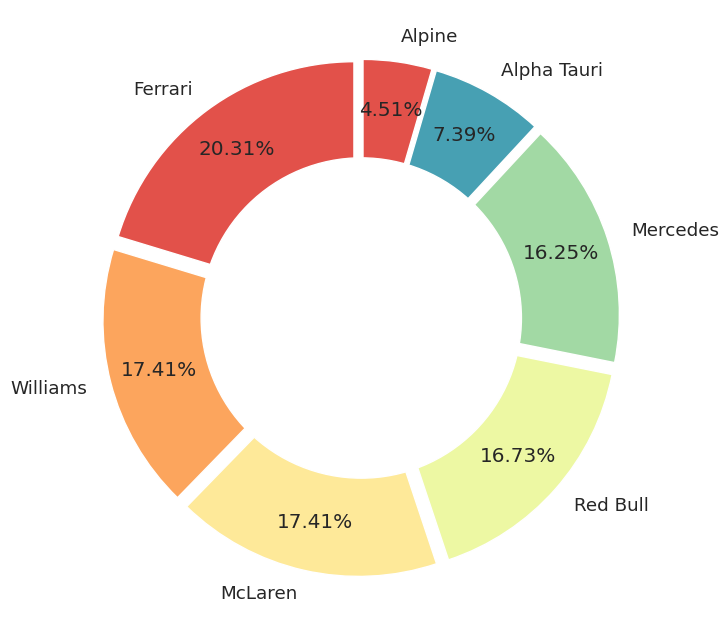

In [32]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

plt.pie(
    x=home_win_constructor['Home Win Ratio'][:7], labels=home_win_constructor['Constructor'][:7],
    colors=sns.color_palette('Spectral'),
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05]*7,
)

### Add a hole in the pie
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()


In [34]:
cleaned_data = data.drop(['Unnamed: 0','dob','driverId','raceId','constructorId','date','DNF (Constructor Fault)', 'DNF (Driver Error)','DNF','Constructor Win',
                                   'circuitId','Country','Race Position','weather_warm', 'weather_cold', 'weather_dry', 'weather_wet','weather_cloudy'], axis=1)

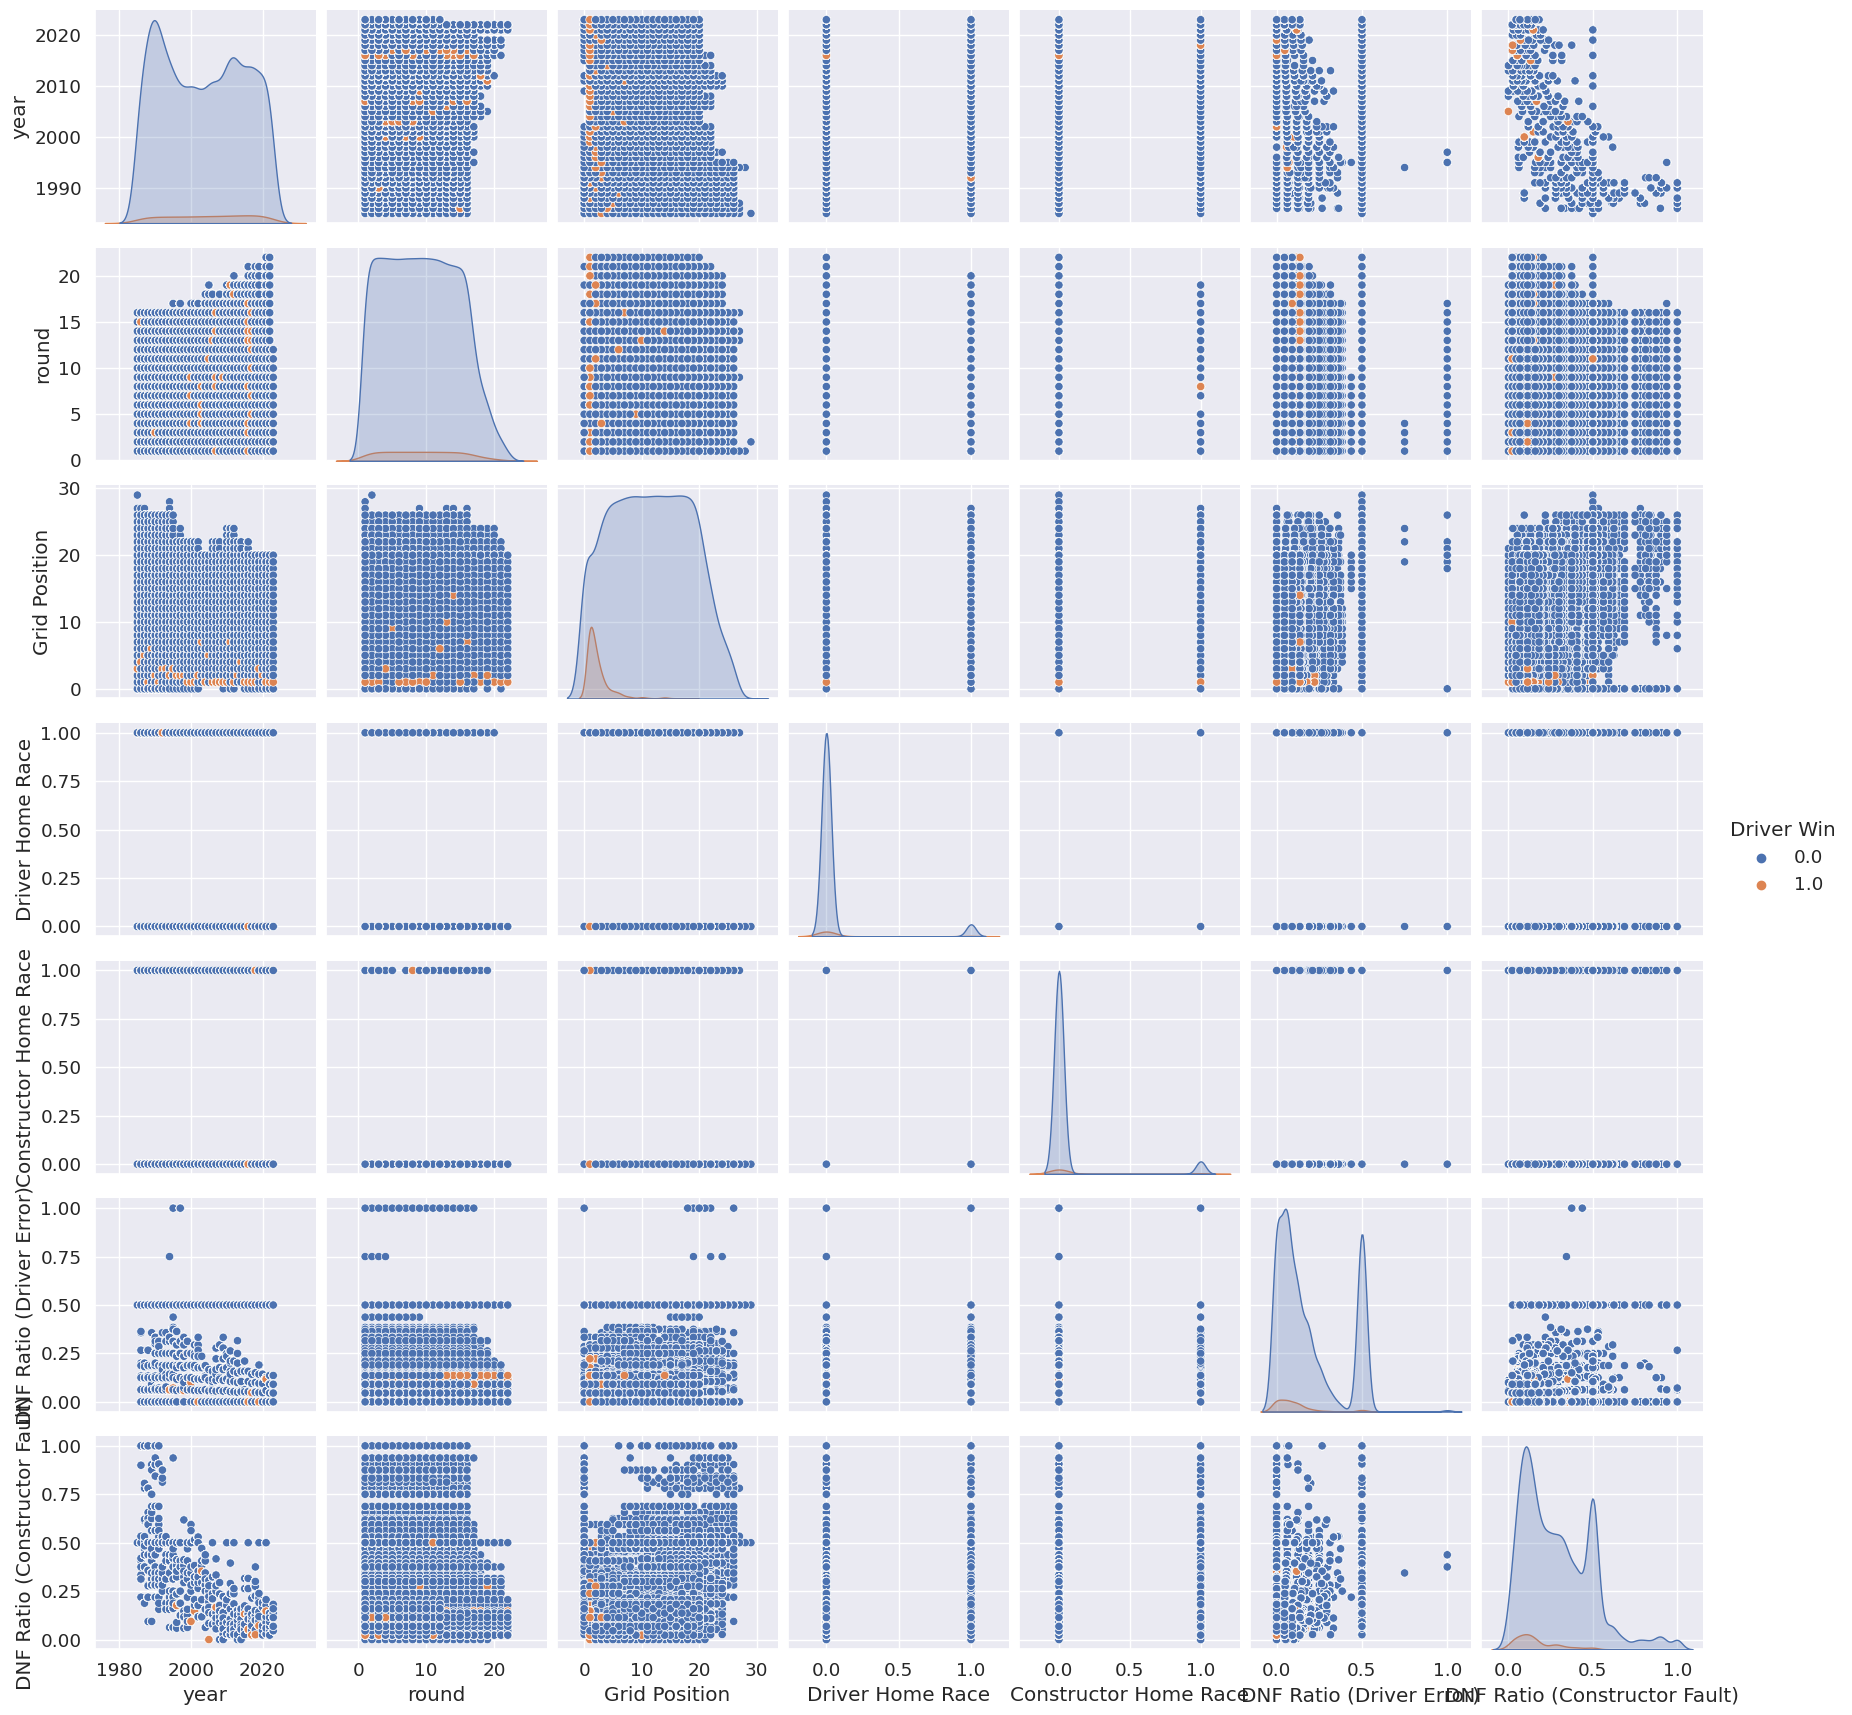

In [35]:
sns.pairplot(cleaned_data, hue='Driver Win')